# Classification and kernel methods

In this project we consider classification problems. We use logistic regression and support vector machine to classify our data.

We consider the ''two moons'' dataset from scikit-learn.

Execute the following code to generate our training and test data.

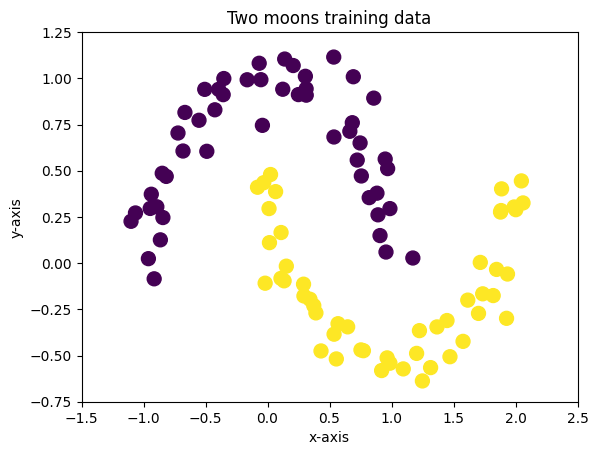

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

N_train = 100
n = 2
X_train, y_train = make_moons(n_samples=N_train, noise=0.1, random_state=0)
y_train[y_train == 0] = -1

N_test = 20
n = 2
X_test, y_test = make_moons(n_samples=N_test, noise=0.1, random_state=0)
y_test[y_test == 0] = -1

fig = plt.figure()
plt.title('Two moons training data')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='viridis')
plt.xlim([-1.5,2.5])
plt.ylim([-0.75,1.25])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

# 1. Logistic regression and linear support vector machine

In this task we want to classify the given test data using logistic regression and linear support vector machine. To do this, we train a model with the training data and apply this model to our test data.

** Task: Use `LogisticRegression` and `SVC` (no kernel) from scikit-learn to classify our given data. Implement your own prediction function depending on the weights $w$ and the intercept $b$. Create a model from the training data. Compute the prediction labels and the accuracy. Plot your results. **


Logistic Regression Model Test Accuracy: 0.85


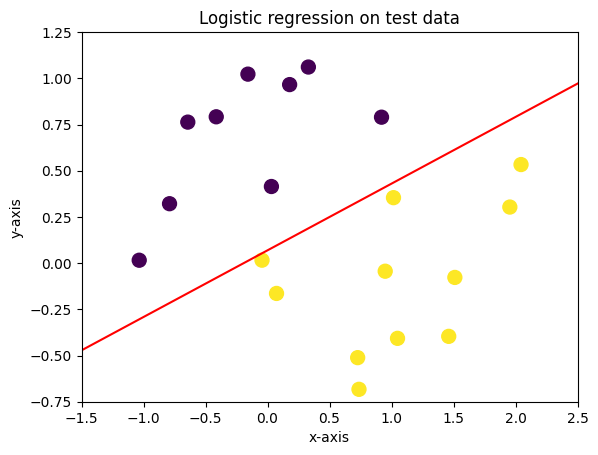

Logistic Regression Model Train Accuracy: 0.86


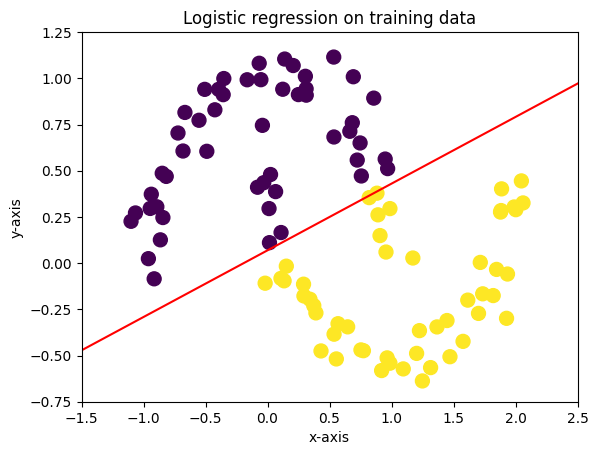

Linear SVM Model Train Accuracy: 0.85


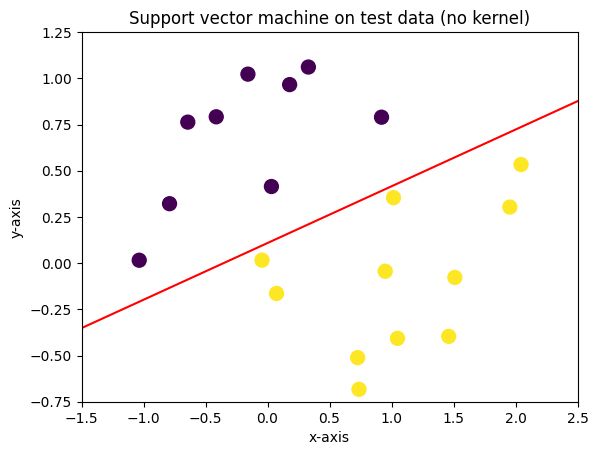

Linear SVM Model Train Accuracy: 0.86


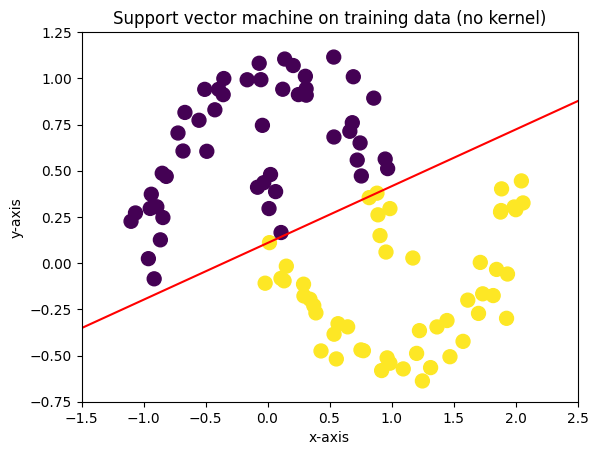

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

############################ YOUR CODE HERE ############################
#prediction function
def predict(w,b,data):
  return np.sign(w @ data.T + b)

#compute accuracy
def accuracy(w,b,data, y):
  margin = np.multiply(y, (w @ data.T + b)) / np.linalg.norm(w, 2)
  return len(np.where(margin[0] > 0)[0]) / len(margin[0])
########################################################################


############################ YOUR CODE HERE ############################
#initialize your logistic regression model
logmodel = LogisticRegression()
#fit your logistic regression model
logmodel.fit(X_train, y_train)
#weights of the logistic regression model
w_log = logmodel.coef_
#intercept of the logistic regression model
b_log = logmodel.intercept_
#predction labels of your logistic regression model for the test data
logpredictions_test = predict(w_log, b_log, X_test)

log_test_accuracy = accuracy(w_log, b_log, X_test, y_test)
print(f"Logistic Regression Model Test Accuracy: {log_test_accuracy}")
########################################################################

fig = plt.figure()
plt.title('Logistic regression on test data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=logpredictions_test, s=100, cmap='viridis')

xx = np.array([-1.5, 2.5])
plt.plot(xx, (-b_log-w_log[0][0]*xx)/w_log[0][1], 'r-')
plt.xlim([-1.5,2.5])
plt.ylim([-0.75,1.25])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

############################ YOUR CODE HERE ############################
#predction labels of your logistic regression model for the training data
logpredictions_train = predict(w_log, b_log, X_train)

log_train_accuracy = accuracy(w_log, b_log, X_train, y_train)
print(f"Logistic Regression Model Train Accuracy: {log_train_accuracy}")
########################################################################

fig = plt.figure()
plt.title('Logistic regression on training data')
plt.scatter(X_train[:, 0], X_train[:, 1], c=logpredictions_train, s=100, cmap='viridis')
plt.plot(xx, (-b_log-w_log[0][0]*xx)/w_log[0][1], 'r-')
plt.xlim([-1.5,2.5])
plt.ylim([-0.75,1.25])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

############################ YOUR CODE HERE ############################
#initialize your svm model
svmmodel = SVC(kernel='linear')
#fit your svm model
svmmodel.fit(X_train, y_train)
#weights of the svm model
w_svm = svmmodel.coef_
#intercept of the svm model
b_svm = svmmodel.intercept_
#predction labels of your svm model for the test data
svmpredictions_test = predict(w_svm, b_svm, X_test)

svm_test_accuracy = accuracy(w_log, b_log, X_test, y_test)
print(f"Linear SVM Model Train Accuracy: {svm_test_accuracy}")
########################################################################

fig = plt.figure()
plt.title('Support vector machine on test data (no kernel)')
plt.scatter(X_test[:, 0], X_test[:, 1], c=svmpredictions_test, s=100, cmap='viridis')

xx = np.array([-1.5, 2.5])
plt.plot(xx, (-b_svm-w_svm[0][0]*xx)/w_svm[0][1], 'r-')
plt.xlim([-1.5,2.5])
plt.ylim([-0.75,1.25])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

############################ YOUR CODE HERE ############################
#predction labels of your svm model for the training data
svmpredictions_train = predict(w_svm, b_svm, X_train)

svm_train_accuracy = accuracy(w_log, b_log, X_train, y_train)
print(f"Linear SVM Model Train Accuracy: {svm_train_accuracy}")
########################################################################

fig = plt.figure()
plt.title('Support vector machine on training data (no kernel)')
plt.scatter(X_train[:, 0], X_train[:, 1], c=svmpredictions_train, s=100, cmap='viridis')
plt.plot(xx, (-b_svm-w_svm[0][0]*xx)/w_svm[0][1], 'r-')
plt.xlim([-1.5,2.5])
plt.ylim([-0.75,1.25])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

Logistic Regression and Linear SVM assume a linear relationship between the input features and the output labels. But our dataset has a curved structure and is not linearly separable.

Now we want to compare the weights $w$ and intercept $b$ from our `svmmodel` with the computed weights and intercept using the dual parameter $\alpha$.

**Task: Compute the weights `w` and the intercept `b` using the dual parameter $\alpha$. Compare your result with the weights and intercept of the svm from scikit-learn. **

Hint: A fitted model contains different fields. The following could be useful.
- `.support_` contains the indices of the support vectors
- `.support_vectors_` contains the support vectors
- `.dual_coef_` contains the non-zero coefficient of the dual parameter $\alpha$
- `.coef_` contains the weights $w$
- `.intercept_` contains the intercept $b$

The following code safes the dual parameter $\alpha$ as you know them from the lecture in`alpha`.

Scikit-learn Weights: [[ 0.74986092 -2.44262025]]
Dual Weights: [ 0.74986092 -2.44262025]

Scikit-learn Intercept: [0.2657462]
Dual Intercept (for each support vectors): [-1.56982876  0.26572807 -0.41526706 -0.47710627 -0.7375019  -0.04429834
 -0.5219755  -0.7492548  -1.81124841 -1.01947519 -1.02972513 -1.31613514
  0.02851592  0.24486376 -0.22053452  0.23516759 -0.18028402 -0.33592293
  1.259       1.71198674  0.28249776  2.06348753  0.26578239  0.5037997
  2.15290251  1.32254113  0.66580852  0.74901271  1.89634113  2.08602982
  0.7172137   0.55169077  0.26572819  0.34600286  0.84610248  0.56606645]



First 5 choices of support vectors for determining intercept


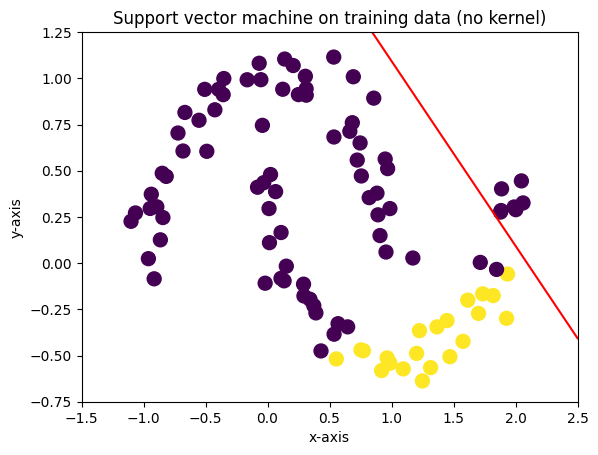

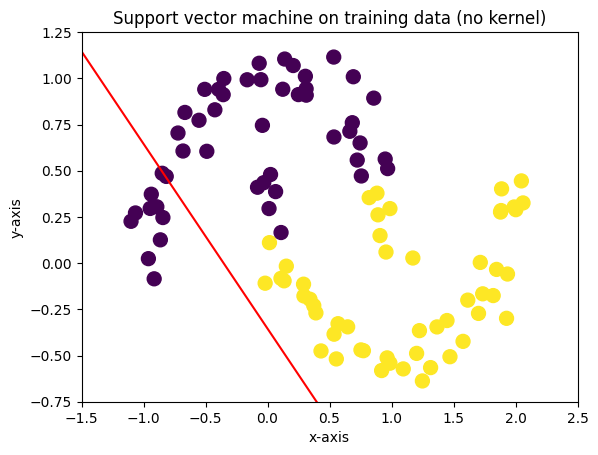

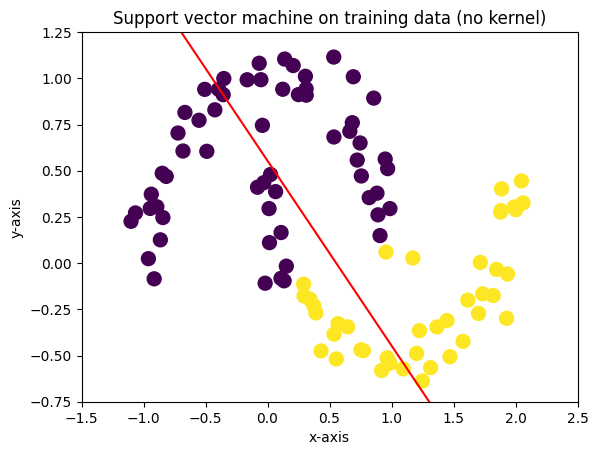

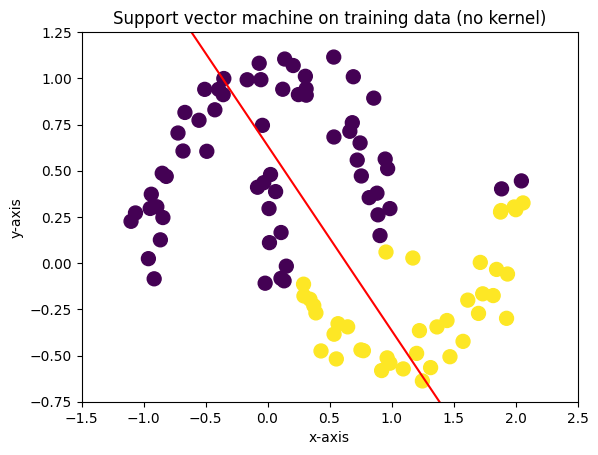

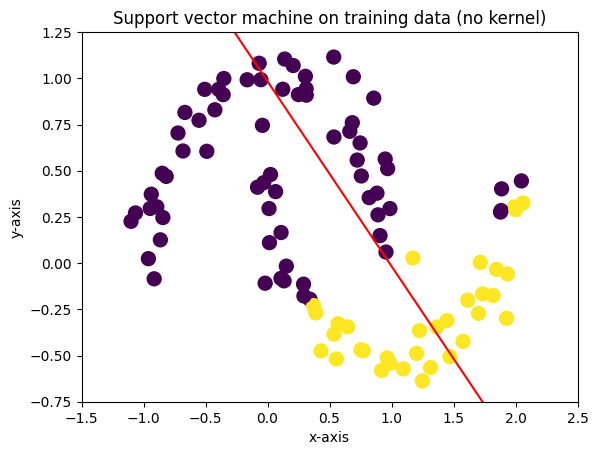




Average of intercepts of each support vector


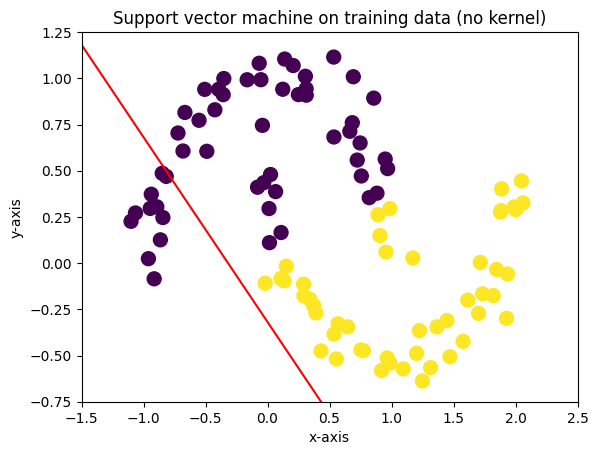

In [ ]:
alpha = np.zeros(X_train.shape[0])
alpha[svmmodel.support_] = np.abs(svmmodel.dual_coef_)

w_dual = X_train.T @ np.diag(y_train) @ alpha
b_dual = y_train[svmmodel.support_] - np.dot(X_train[svmmodel.support_], w_dual)

print(f"Scikit-learn Weights: {w_svm}")
print(f"Dual Weights: {w_dual}")
print()

print(f"Scikit-learn Intercept: {b_svm}")
print(f"Dual Intercept (for each support vectors): {b_dual}")
print("\n\n")

print("First 5 choices of support vectors for determining intercept")
for b in b_dual[:5]:
  dualpredictions_train = predict(w_dual, b, X_train)

  fig = plt.figure()
  plt.title('Support vector machine on training data (no kernel)')
  plt.scatter(X_train[:, 0], X_train[:, 1], c=dualpredictions_train, s=100, cmap='viridis')
  plt.plot(xx, (-b-w_dual[0]*xx)/w_dual[0], 'r-')
  plt.xlim([-1.5,2.5])
  plt.ylim([-0.75,1.25])
  plt.xlabel("x-axis")
  plt.ylabel("y-axis")
  plt.show()

print("\n\n")
print("Average of intercepts of each support vector")
b = np.mean(b_dual)
dualpredictions_train = predict(w_dual, b, X_train)

fig = plt.figure()
plt.title('Support vector machine on training data (no kernel)')
plt.scatter(X_train[:, 0], X_train[:, 1], c=dualpredictions_train, s=100, cmap='viridis')
plt.plot(xx, (-b-w_dual[0]*xx)/w_dual[0], 'r-')
plt.xlim([-1.5,2.5])
plt.ylim([-0.75,1.25])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

# 2. Support vector machine using the Gaussian kernel

We have seen that we can not optimally classify the data without a kernel. Therefore, we now want to use the Gaussian kernel to classify the data.

The following code contains the function `plot_rbf_classifier`. It uses the SVM algorithm using the Gaussian kernel to classify the input data. The function creates a plot with the following informations:

* The data points are depicted by thick blue or green dots, depending on their class,
* The solid red line shows the separating ''hyperplane'', i.e., the line where the decision function is 0,
* The support vectors are encircled in red,
* The areas of high confidence, i.e., the domain where the decision function is $\geq 1$ or $\leq -1$, are colored in blue or green and encircled with a dashed red line, which are the lines where the decision function is $1$ or $-1$.

The function takes the test data $X$, the corresponding labels $y$ and the $\gamma$ parameter as inputs.

Execute the following code.

In [ ]:
def rbf_kernel(x1, x2, rbf_gamma):
    return np.exp(-rbf_gamma*((x1-x2)**2).sum())

def rbfsvm_weight_dot(X, y, alpha, x, rbf_gamma):
    return sum(alpha[i] * y[i] * rbf_kernel(X[i], x, rbf_gamma)
               for i in range(y.size))

def rbfsvm_decision_function(X, y, X_test, alpha, b, rbf_gamma):
    return np.array([rbfsvm_weight_dot(X, y, alpha, x, rbf_gamma) + b for x in X_test])

def plot_rbf_classifier(X,y,rbf_gamma):

    svmmodel = SVC(kernel='rbf',probability=False, C=200,gamma=rbf_gamma)
    svmmodel.fit(X, y)

    alpha = np.zeros(X.shape[0])
    alpha[svmmodel.support_] = np.abs(svmmodel.dual_coef_)

    b = svmmodel.intercept_

    ax = plt.gca()

    # plot the dataset a first time to get the domain bounds
    colors = ['darkblue' if yi == -1 else 'darkgreen' for yi in y]
    ax.scatter(X[:, 0], X[:, 1], c=colors, s=100)
    x1min, x1max, x2min, x2max = ax.axis()

    # set up a grid of 30x30 points on the plotted domain
    x1 = np.linspace(x1min, x1max, 30)
    x2 = np.linspace(x2min, x2max, 30)
    X1_plot, X2_plot = np.meshgrid(x1, x2)
    X_plot = np.vstack((X1_plot.ravel(), X2_plot.ravel())).T

    # evaluate the decision function on the grid
    Y_plot = Y_plot = rbfsvm_decision_function(X, y, X_plot, alpha, b, rbf_gamma).reshape(X1_plot.shape)

    # fill blue and yellow areas of high confidence (abs(decision function) > 1)
    ax.contourf(X1_plot, X2_plot, Y_plot,
                colors=['blue','white','green'],
                alpha=0.4,
                levels=[-np.inf,-1,1,np.inf])

    # draw level sets of decision function
    ax.contour(X1_plot, X2_plot, Y_plot,
               colors='red',
               levels=[-1,0,1],
               linestyles=['--', '-', '--'])

    # draw red circles around the support vectors
    X_support = X[alpha > 1e-4, :]
    ax.scatter(X_support[:, 0], X_support[:, 1],
               s=300,
               linewidth=1,
               facecolors='none',
               edgecolor='red');

    # re-plot the data points to bring them to the front
    ax.scatter(X[:, 0], X[:, 1], c=colors, s=100)

    ax.axis([x1min, x1max, x2min, x2max])

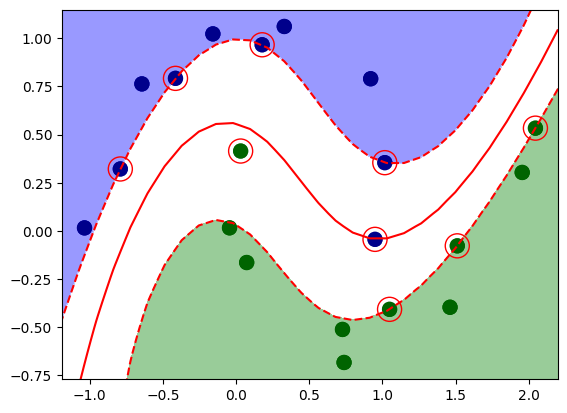

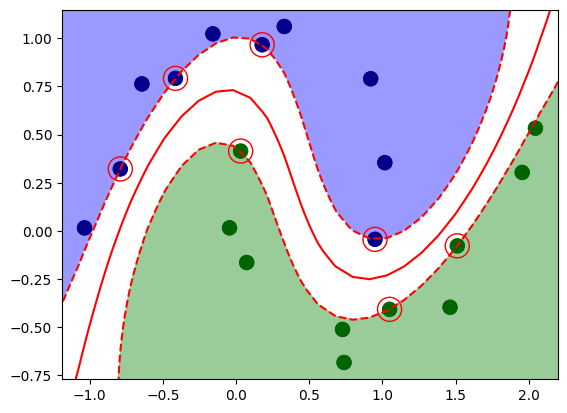

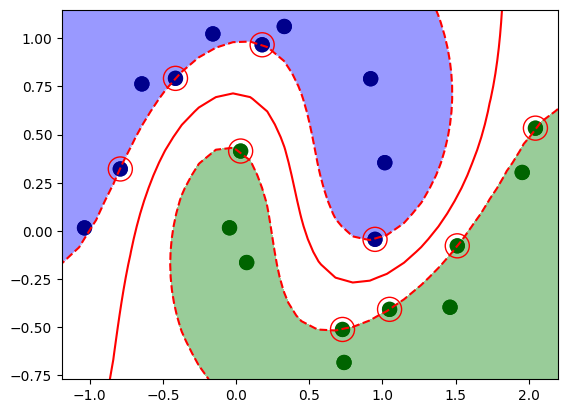

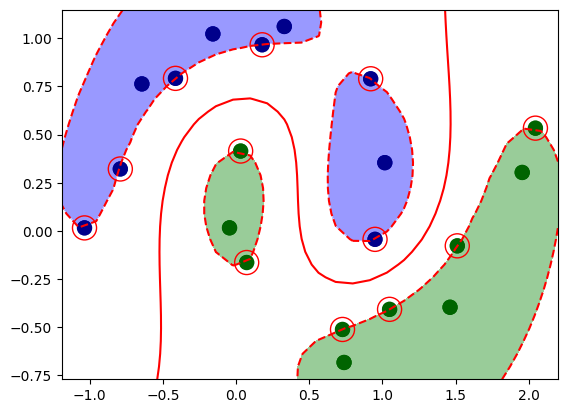

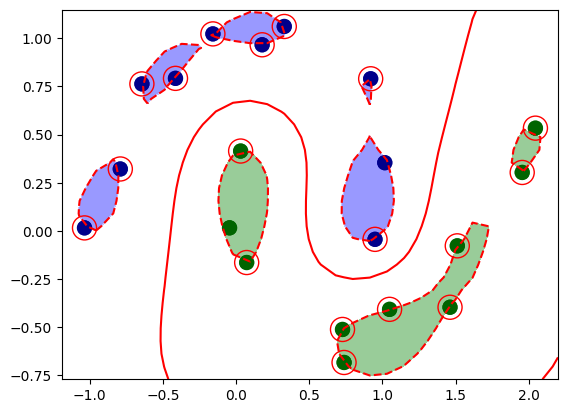

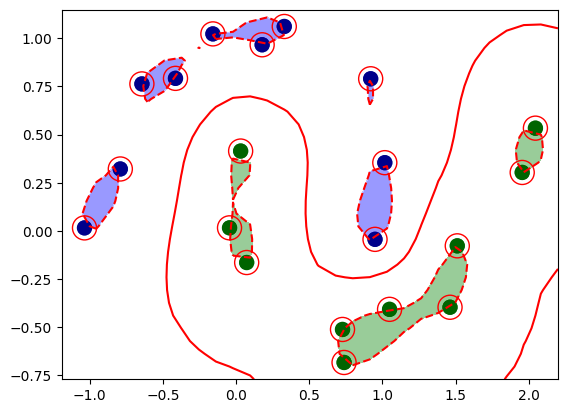

In [ ]:
rbf_gammas = [0.2, 0.5, 1, 2, 5, 10]

for rbf_gamma in rbf_gammas:
  plt.figure()
  plot_rbf_classifier(X_test, y_test, rbf_gamma)

When the $\gamma$ is low, the model has a broader, smoother decision boundary and tends to underfit. It generalizes well but might miss finer details in complex datasets.

When the $\gamma$ is high, it has a very tight decision boundary and can capture intricate patterns but risks overfitting, as it adapts too closely to the training data.

# 3. Soft margin classifier

In this task we would like to look at the influence of penalty parameter $C$ on the SVM algorithm. For this we consider the soft margin classifier problem.

$$
\underset{(w,b) \in \mathbb{R}^{p} \times \mathbb{R}}{\mathrm{min}} \ \ \  \frac{1}{2} \Vert w \Vert^{2}_{2} + C \Vert \xi \Vert_{1}  \\
\mathrm{s.t.} \ \ \ 1 - \xi_{i} \leq y_{i} (w^{\mathrm{T}} x_{i} + b) \\
\xi \geq 0
$$
This problem takes into account that not every data point will be classified correctly.

The following code contains the function `fit_and_plot_svc`. This function applies the SVM algorithm for fixed $\gamma = 0.5$ and given penalty parameter $C$ and plots the result like the function `plot_rbf_classifier` above.

Execute the following code.

In [ ]:
def fit_and_plot_svc(C):

    ax = plt.gca()

    model = SVC(kernel='rbf', gamma=0.5, C=C)
    model.fit(X_test, y_test)

    # plot the dataset a first time to get the domain bounds
    colors = ['darkblue' if yi < 0 else 'darkgreen' for yi in y_test]
    ax.scatter(X_test[:, 0], X_test[:, 1], c=colors, s=100)
    x1min, x1max, x2min, x2max = ax.axis()

    # set up a grid of 30x30 points on the plotted domain
    x1 = np.linspace(x1min, x1max, 30)
    x2 = np.linspace(x2min, x2max, 30)
    X1_plot, X2_plot = np.meshgrid(x1, x2)
    X_plot = np.vstack((X1_plot.ravel(), X2_plot.ravel())).T

    # evaluate the decision function on the grid
    Y_plot = model.decision_function(X_plot).reshape(X1_plot.shape)

    # fill blue and yellow areas of high confidence (abs(decision function) > 1)
    ax.contourf(X1_plot, X2_plot, Y_plot,
                colors=['blue','white','green'],
                alpha=0.4,
                levels=[-np.inf,-1,1,np.inf])

    # draw level sets of decision function
    ax.contour(X1_plot, X2_plot, Y_plot,
               colors='red',
               levels=[-1,0,1],
               linestyles=['--', '-', '--'])

    # draw red circles around the support vectors
    X_support = model.support_vectors_
    ax.scatter(X_support[:, 0], X_support[:, 1],
               s=300,
               linewidth=1,
               facecolors='none',
               edgecolor='red');

    # re-plot the data points to bring them to the front
    ax.scatter(X_test[:, 0], X_test[:, 1], c=colors, s=100)

    ax.axis([x1min, x1max, x2min, x2max])
    plt.title(f"C = {C}")
    return model

Using interactive widgets, we can visualize the dynamic with respect to the regularization parameter C.

Execute the following code.

interactive(children=(IntSlider(value=25, description='C', max=50, min=1), Output()), _dom_classes=('widget-in…

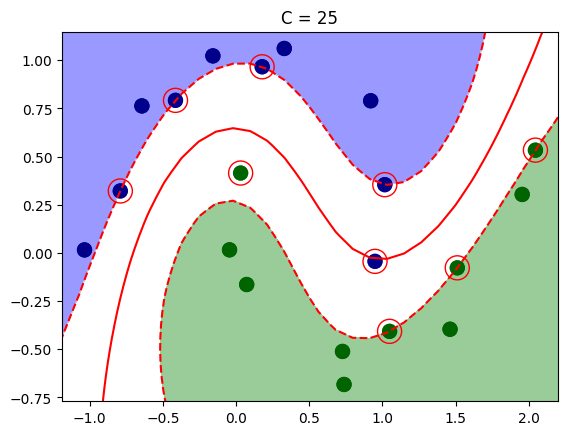

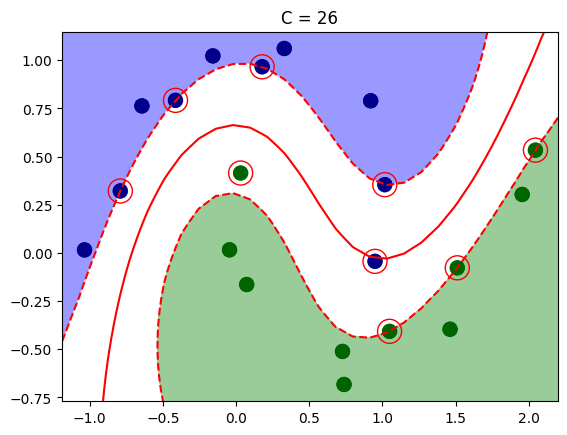

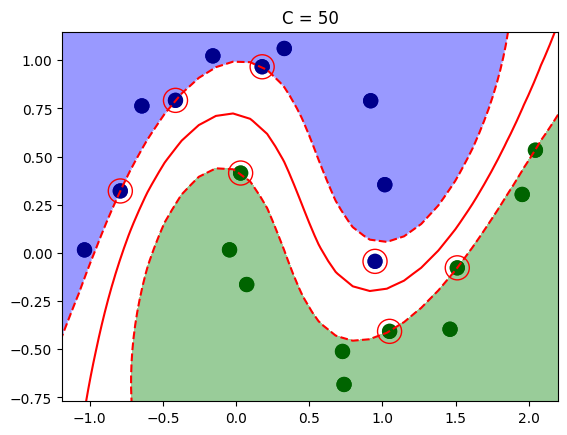

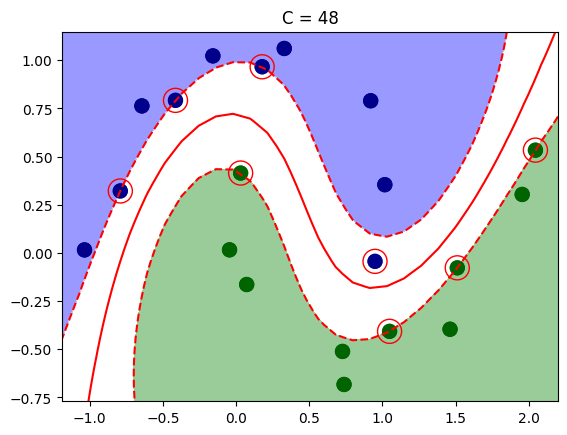

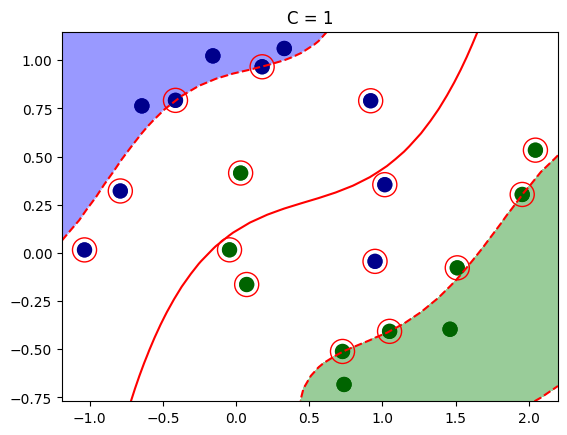

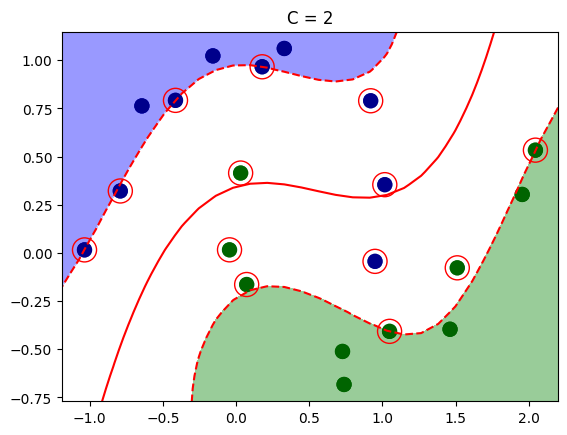

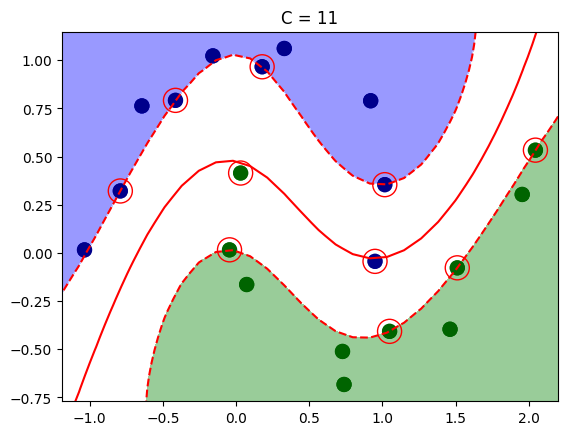

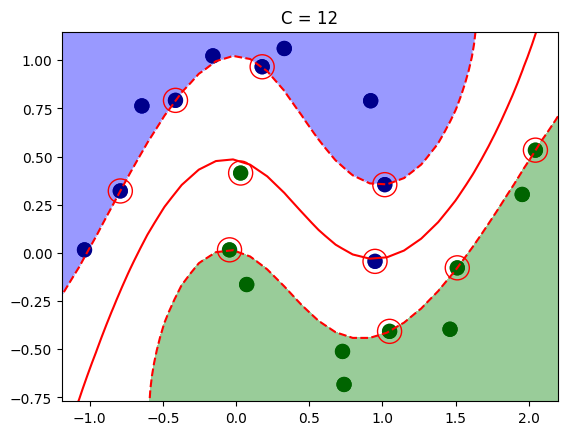

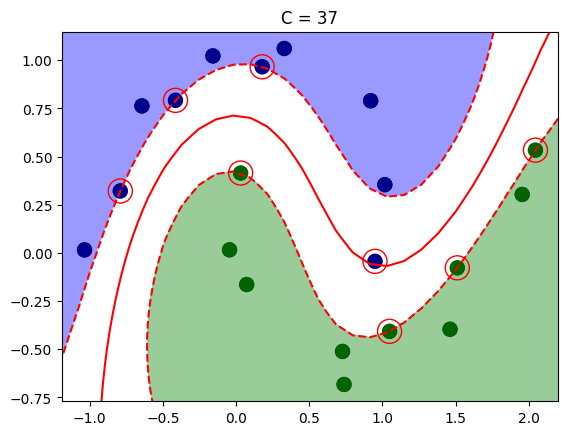

In [ ]:
from ipywidgets import interactive

fig = plt.figure()
interactive(fit_and_plot_svc, C=(1,50,1))

For lower values (C=1), the model has a larger margin with some misclassifications, with a better generalization but also an underfitting. Higher values (C=50) result in a tighter decision boundary, minimizing misclassifications but risking overfitting. Our choice of C for the best model, thus would be chosen close around $C = 50$, but slightly lower than 50.